### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [193]:
import pandas as pd

df = pd.read_csv("C:\\Users\\sony\\Downloads\\Uber Trips Analysis\\Uber Trips Analysis\\data\\uber-raw-data-aug14.csv")
df.head()


,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [194]:
# Convert the 'Date/Time' column to datetime format
df["Date/Time"]=pd.to_datetime(df["Date/Time"])


# Group by date and count the number of pickups
number_of_pickup = df.groupby(df["Date/Time"].dt.date).size()


# Find the date with the highest number of pickups

print('On This Day',number_of_pickup.idxmax(),'total Number of Pickup' ,max(number_of_pickup),'was the Highest Number of Pickup recoreded' )


On This Day 2014-08-07 total Number of Pickup 32759 was the Highest Number of Pickup recoreded


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [195]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
filter_pixkup_data = df.groupby(df["Date/Time"].dt.date).size().idxmax

# Get the count of pickups on the highest date
print('Number of pickups count on the Highest date[Last Date of the month is',number_of_pickup[-1])



Number of pickups count on the Highest date[Last Date of the month is 23271


In [196]:
#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?
#**Skill Test:** Counting unique values


In [197]:
# Count the number of unique TLC base companies

Unique_Companies = df['Base'].nunique()
print('Number of unique comapnies present in the TLC base comapnies are',Unique_Companies)

Number of unique comapnies present in the TLC base comapnies are 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [198]:
# Group by TLC base company and count the number of pickups
TLC_companies = df.groupby(df['Base']).size()


# Find the TLC base company with the highest number of pickups
print('Highest Number of pickups made by TLC base comapny is',TLC_companies.idxmax())

Highest Number of pickups made by TLC base comapny is B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [199]:
# Group by TLC base company and count the number of pickups
df.groupby(df['Base']).size()



Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [200]:
# Extract the hour from the 'Date/Time' column
hour =  df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
no_pickup_by_hours = df.groupby(hour).size()

# Find the hour with the highest number of pickups

print(no_pickup_by_hours.idxmax()+1,'hour is found as a MOST NUMBERS OF PICKUPS made')
###  '+ 1 ' to make it into human numerical value

18 hour is found as a MOST NUMBERS OF PICKUPS made


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

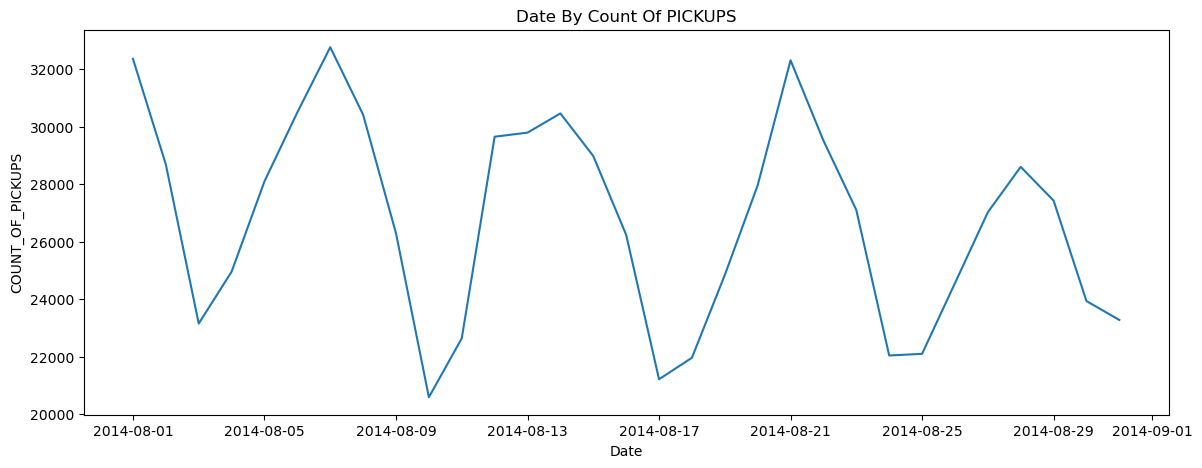

In [201]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
date_by_pickups = df.groupby(df['Date/Time'].dt.date).size()

# Create a line plot to visualize the number of pickups over time
date_by_pickups.plot(kind = 'line',figsize = (14,5))
plt.xlabel('Date')
plt.ylabel('COUNT_OF_PICKUPS')
plt.title('Date By Count Of PICKUPS')
plt.show()


#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

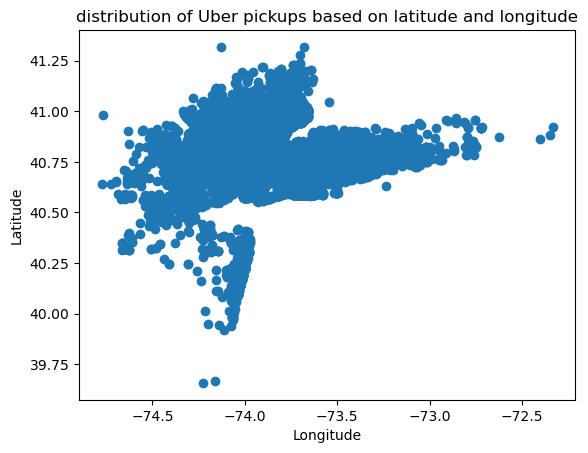

In [202]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.scatter(df['Lon'],df['Lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('distribution of Uber pickups based on latitude and longitude')
plt.show()


#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

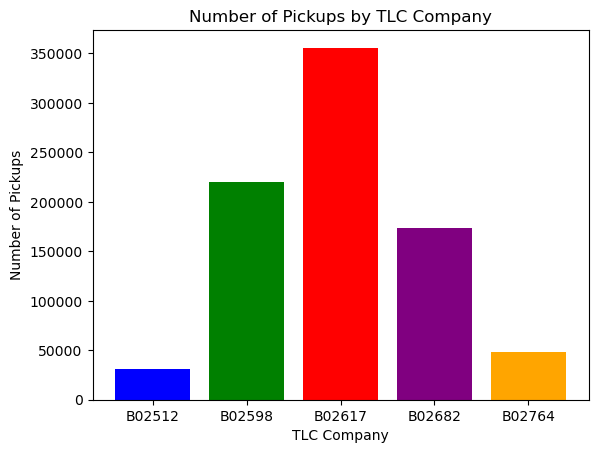

In [203]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
TLC_company  = df.groupby('Base').size()
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.bar(TLC_company.index,TLC_company.values,color=colors)
plt.title('Number of Pickups by TLC Company')
plt.xlabel('TLC Company')
plt.ylabel('Number of Pickups')
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

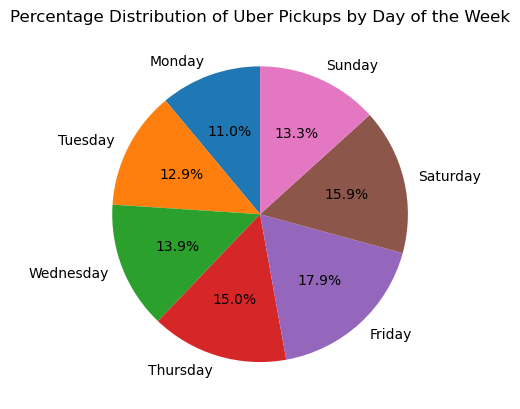

In [204]:
# Group by day of the week and count the number of pickups
weekly_pickups = df.groupby(df['Date/Time'].dt.dayofweek).size()
percentage = weekly_pickups / weekly_pickups.sum() * 100

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(percentage,labels = days_of_week ,autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.show()


